# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


# Loading dataset

In [2]:
df=pd.read_csv('C:\\Users\\santhosh\\Downloads\\archive (5)\\amazon_reviews.csv',index_col='Unnamed: 0')

In [3]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,50423057,R135Q3VZ4DQN5N,B00JWXFDMG,657335467,Everbling Purple and Clear Briolette Drop Swar...,Jewelry,5,0,0,N,Y,Beauties!,so beautiful even tho clearly not high end ......,2015-08-31
1,US,11262325,R2N0QQ6R4T7YRY,B00W5T1H9W,26030170,925 Sterling Silver Finish 6ct Simulated Diamo...,Jewelry,5,0,0,N,N,Great product.,"Great product.. I got this set for my mother, ...",2015-08-31
2,US,27541121,R3N5JE5Y4T6W5M,B00M2L6KFY,697845240,"Sterling Silver Circle ""Friends Forever"" Infin...",Jewelry,5,0,0,N,Y,Exactly as pictured and my daughter's friend l...,Exactly as pictured and my daughter's friend l...,2015-08-31
3,US,5350721,R2I150CX5IVY9Q,B0006SW2WU,569859289,Surgical Stainless Steel Domed 9mm Fishbone Ri...,Jewelry,5,0,0,N,Y,Five Stars,Love it. Fits great. Super comfortable and nea...,2015-08-31
4,US,24484424,R1RM9ICOOA9MQ3,B009YPDW70,332947422,"Sterling Silver Family Pendant Necklace, 18""",Jewelry,5,0,0,N,Y,... a Mother's Day gift for my Mom and she lov...,Got this as a Mother's Day gift for my Mom and...,2015-08-31


# Data analysis

# For our analysis we dont need every columns for sentiment analysis we just need star_rating and review body from our dataset

In [4]:
selected_features=['review_body','star_rating']
df=df[selected_features]

In [5]:
df.head()

,review_body,star_rating
0,so beautiful even tho clearly not high end ......,5
1,"Great product.. I got this set for my mother, ...",5
2,Exactly as pictured and my daughter's friend l...,5
3,Love it. Fits great. Super comfortable and nea...,5
4,Got this as a Mother's Day gift for my Mom and...,5


# Simplyfy the task so that machine could easily understand and process the data 
We would put the condition on star_rating that if star rating is greater than 3 then it is positive else it is negative and for star rating 3 it would be neutral becasue the rating 3 like person neither dissappoint nor happy with the product

In [6]:
df['star_rating'].value_counts()

5    62705
4    13931
1     9339
3     8510
2     5515
Name: star_rating, dtype: int64

In [7]:
#creating new feature
df['label']=list(map(lambda x : 1 if x>3  else (0 if x<3 else 3),df['star_rating']))

In [8]:
df.head()

,review_body,star_rating,label
0,so beautiful even tho clearly not high end ......,5,1
1,"Great product.. I got this set for my mother, ...",5,1
2,Exactly as pictured and my daughter's friend l...,5,1
3,Love it. Fits great. Super comfortable and nea...,5,1
4,Got this as a Mother's Day gift for my Mom and...,5,1


In [9]:
df.shape


(100000, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_body  99951 non-null   object
 1   star_rating  100000 non-null  int64 
 2   label        100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.1+ MB


In [11]:
df['label'].value_counts()

1    76636
0    14854
3     8510
Name: label, dtype: int64

# Data visualization

<AxesSubplot:>

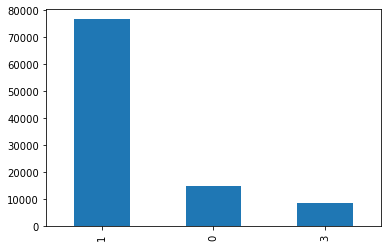

In [12]:
df['label'].value_counts().plot(kind='bar')

# Data preprocessing

In [13]:
# converting the review in lower case 
df["pre_process"]=df["review_body"].apply(lambda x :str(x).lower())

In [14]:
 # removing the HTML tags and URL from Review_body 
df["pre_process"]=df["pre_process"].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())

C:\Users\santhosh\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\santhosh\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [15]:
# coverting the words like can't to can not 
def contraction(s):
    s=re.sub(r"won't","will not",s)
    s=re.sub(r"would't","would not",s)
    s = re.sub(r"could't", "could not",s)
    s = re.sub(r"\'d", " would",s)
    s = re.sub(r"can\'t", "can not",s)
    s = re.sub(r"n\'t", " not", s)
    s= re.sub(r"\'re", " are", s)
    s = re.sub(r"\'s", " is", s)
    s = re.sub(r"\'ll", " will", s)
    s = re.sub(r"\'t", " not", s)
    s = re.sub(r"\'ve", " have", s)
    s = re.sub(r"\'m", " am", s)
    s = re.sub(r"doesn't", "does not",s)
    return s
df["pre_process"]=df["pre_process"].apply(lambda x:(contraction(x)))

In [16]:
# removing non-alphabetic characters
df["pre_process"]=df["pre_process"].apply(lambda x:" ".join([re.sub('[^A-Za-z]+','',x) for x in nltk.word_tokenize(x)]))

In [17]:
# removing stopwords 
from nltk.corpus import stopwords
stop=stopwords.words("english")
df["pre_process"]=df["pre_process"].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))


In [18]:
#  Lemmatize 
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
df["pre_process"]=df["pre_process"].apply(lambda x:" ".join([lemma.lemmatize(x)for x in nltk.word_tokenize(x)]))

In [19]:
df.head()

,review_body,star_rating,label,pre_process
0,so beautiful even tho clearly not high end ......,5,1,beautiful even tho clearly high end super grea...
1,"Great product.. I got this set for my mother, ...",5,1,great product got set mother allergic bijou pr...
2,Exactly as pictured and my daughter's friend l...,5,1,exactly pictured daughter friend loved came pa...
3,Love it. Fits great. Super comfortable and nea...,5,1,love fit great super comfortable neat idea fis...
4,Got this as a Mother's Day gift for my Mom and...,5,1,got mother day gift mom loved really nice qual...


# Importing all Standard library for model building

In [20]:
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words and TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Splitiing Data

In [21]:
X=df["pre_process"]

In [22]:
y=df["label"]

In [23]:
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)
print("Train Size: ",X_train.shape,y_train.shape,"   Test Size: ",(X_test.shape,y_test.shape))

Train Size:  (70000,) (70000,)    Test Size:  ((30000,), (30000,))


In [24]:
# Using TF-IDF vector for word embedding 
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

In [25]:
X_train=tf_x_train
X_train

<70000x22526 sparse matrix of type '<class 'numpy.float64'>'
	with 728997 stored elements in Compressed Sparse Row format>

In [26]:
X_test=tf_x_test
X_test

<30000x22526 sparse matrix of type '<class 'numpy.float64'>'
	with 308863 stored elements in Compressed Sparse Row format>

# Model building with  DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [28]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [29]:
#  test score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [30]:
# Make predictions on the train set
y_pred = clf.predict(X_train)

In [31]:
#  train score
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


# Building the model with RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [33]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [34]:
# test score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


In [35]:
# Make predictions on the train set
y_pred = clf.predict(X_train)

In [36]:
# Evaluate the model train score
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


# Accuracy of the model is 80%